# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# In Step 1, use the groupby() function to create a Series of data that has the type of city as the index, 
# then apply the count() method to the "ride_id" column.

ride_count_by_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_by_city.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
# In Step 2, use the groupby() function to create a Series of data that has the type of city as the index, 
# then apply the sum() method to the "driver_count" column.

total_drivers_by_city = city_data_df.groupby("type").sum()["driver_count"]
total_drivers_by_city.head()


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
# In Step 3, use the groupby() function to create a Series of data that has the type of city as the index, 
# then apply the sum() method to the "fare" column.

total_fares_by_city = pyber_data_df.groupby("type").sum()["fare"]
total_fares_by_city.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
# In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
average_fare_by_city = total_fares_by_city / ride_count_by_city
average_fare_by_city.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
# In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_per_driver_by_city = total_fares_by_city / total_drivers_by_city
average_fare_per_driver_by_city.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
# In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5,(pic w/column names)

summary_df = pd.DataFrame({"Total Rides": ride_count_by_city, "Total Drivers": total_drivers_by_city, 
                          "Total Fares": total_fares_by_city, "Average Fare per Ride": average_fare_by_city, 
                          "Average Fare per Driver": average_fare_per_driver_by_city})

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
# In Step 7, use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.

summary_df.index.name = None

In [10]:
#  8. Format the columns. (see pic)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)

summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)

summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

# In Step 1, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns 
# of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.

# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


weekly_fare_by_type_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]

weekly_fare_by_type_df.head()



type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [12]:
# In Step 2, use the provided code snippet to reset the index. This is needed to use the pivot() function in the next step

weekly_fare_by_type_df = weekly_fare_by_type_df.reset_index()
weekly_fare_by_type_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [13]:
# 3. In Step 3, use the pivot() function to convert the DataFrame from the previous step so that the index is the "date," 
# each column is a city "type," and the values are the "fare." (check the picture & hint)

weekly_fare_by_type_and_date_pivot = weekly_fare_by_type_df.pivot(index = "date", columns = "type", values = "fare")
weekly_fare_by_type_and_date_pivot.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [14]:
# 4. In Step 4, create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-28.

filtered_weekly_df = weekly_fare_by_type_and_date_pivot.loc['2019-01-01':'2019-04-28']

filtered_weekly_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. In Step 5, use the provided code snippet to reset the index of the DataFrame from the previous step (Step 4) to a datetime 
# data type. This is necessary to use the resample() method in Step 7.

filtered_weekly_df.index = pd.to_datetime(filtered_weekly_df.index)

filtered_weekly_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 6. In Step 6, use the provided code snippet, df.info(), to check that the "date" is a datetime data type.

filtered_weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [17]:
# 7. In Step 7, create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5. 
# Resample the data in weekly bins, then apply the sum() method to get the total fares for each week. (hint & pic)

filtered_weekly_week_df = filtered_weekly_df.resample("W").sum()
filtered_weekly_week_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [18]:
filtered_weekly_week_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [19]:
filtered_weekly_week_df.index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')

In [20]:
filtered_weekly_week_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


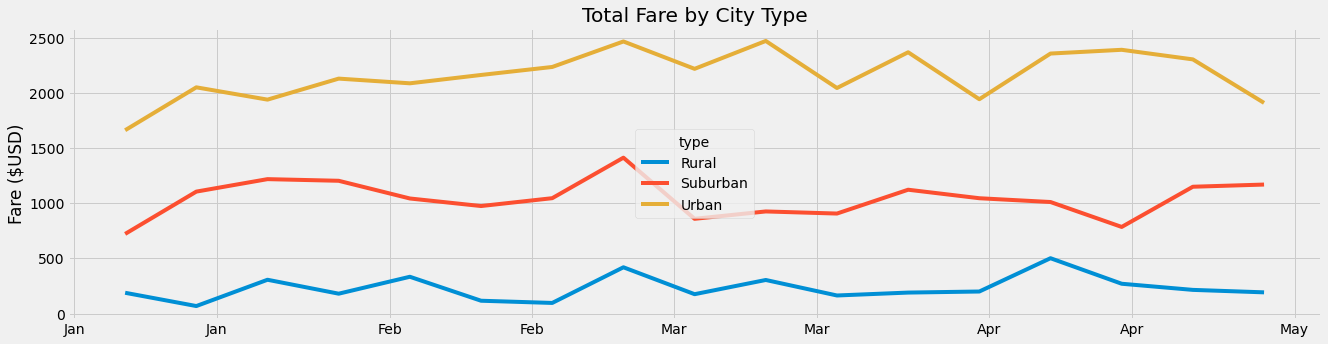

In [22]:
# 8. Finally, in Step 8, graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot() 
# method, as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
# Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png 
# in your "analysis" folder. (check pic)



x = filtered_weekly_week_df.index

fig, ax = plt.subplots(figsize=[20, 5])
ax.plot(x, filtered_weekly_week_df["Rural"], label = "Rural")


ax.plot(x, filtered_weekly_week_df["Suburban"], label = "Suburban" )


ax.plot(x, filtered_weekly_week_df["Urban"], label = "Urban" )



import matplotlib.dates as mdates
month_year_formatter = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(month_year_formatter)


ax.set_ylabel("Fare ($USD)")

plt.title("Total Fare by City Type")
plt.legend(title = "type",loc="center")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


plt.show
plt.savefig("Analysis/PyBer_fare_summary.png")
